In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
sns.set_style('white')

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

#### Using uniform dist for Q

In [211]:
def Variational_Monte_Carlo(steps,equlibration_steps,alpha_interval,alpha_step,interval):
    
    def uniform_random(r):
        r1,r2 = np.random.uniform(0,1,2)
        theta= np.arccos(1-2*r1)
        phi=2*np.pi*r2
        x = r*np.sin(theta)*np.cos(phi) ; y = r*np.sin(theta)*np.sin(phi) ; z = r*np.cos(theta)
        return np.array([x,y,z])
    
    def Psi(r, alpha):
        return np.exp(- alpha * r) 

    def W(inteval,r_i, alpha):
        
        r_trial = r_i+ (np.random.uniform(low=-interval,high=interval,size=(3))) #uniform_random(inteval)
        r_trial_norm = np.linalg.norm(r_trial) ; r_i_norm = np.linalg.norm(r_i)
        
        w = np.power(Psi(r_trial_norm,alpha)/Psi(r_i_norm,alpha),2)
        return w,r_trial

    def Metropolice(steps,equlibration,interval,alpha,r_i):
        r,e,ee = [],[],[] ; 
        for i in range(steps):
            w,r_trial = W(interval, r_i, alpha)
            if w>1 : r_i = r_trial
            elif np.random.rand() <= w: r_i = r_trial

            if equlibration<steps:
                r.append(r_i)
                #print(r_i)
                el = -1/np.linalg.norm(r_i)-(alpha**2-2*alpha/np.linalg.norm(r_i))/2 #EL
                e.append(el)
                ee.append(el**2)
        return np.mean(e)/(steps-equlibration), np.mean(ee)/(steps-equlibration), r_i

    r_i = np.random.randint(low=-interval,high=interval,size=(3))  #initial 
    E,EE,Evar,R = [],[],[],[]
    Alpha = np.linspace(alpha_interval[0],alpha_interval[1],alpha_step)
    for alpha in Alpha:
        e,ee,r_i = Metropolice(steps,equlibration_steps,interval,alpha,r_i)
        E.append(e) ; EE.append(ee - e**2) ; R.append(r_i) ; Evar.append(ee)
    return E,EE,Evar,R,Alpha

In [454]:
n = 1000
E,EE,Evar,X,alpha = Variational_Monte_Carlo(n+n//2,n//2,[0,1.5],100,1)

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [3]:
# Your code here

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

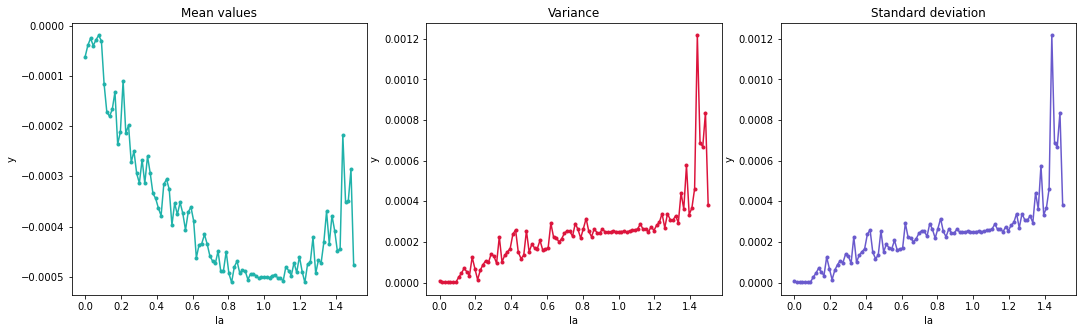

In [456]:
fig = plt.figure(figsize=(18, 5))
for x,y,axis,c,name in zip([alpha,alpha,alpha],[E,Evar,EE],range(1,4),['lightseagreen','crimson','slateblue'],['Mean values','Variance','Standard deviation']):
    ax =  fig.add_subplot(1, 3, axis )
    y=np.array(y)
    plt.plot(x,y,color=c,marker='.')
    plt.xlabel('la') ; plt.ylabel('y')
    plt.title(name)

# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [13]:
from scipy.fft import fft, fftshift, fftfreq

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
ti = 0    #s
tf = 20   #s

def X(t):
    return 2*np.sin(t) + np.sin(10*t)
T = np.linspace(ti,tf,n)
x = [X(t) for t in T]

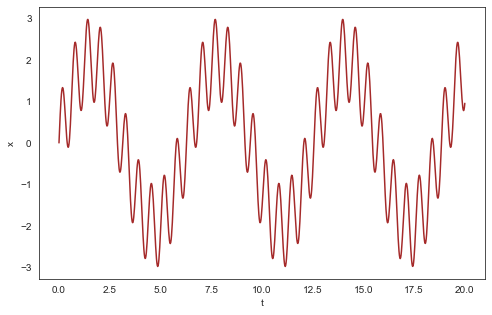

In [29]:
fig = plt.figure(figsize=(8, 5))
plt.plot(T,x,color='brown')
plt.xlabel("t") ; plt.ylabel("x")
plt.show()

(0.0, 3.0)

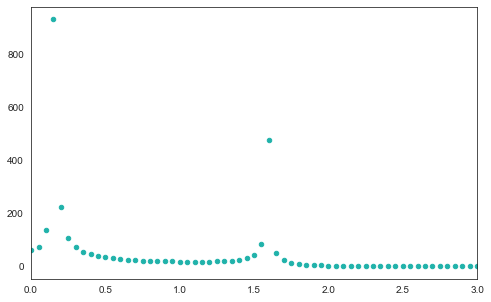

In [30]:
fig = plt.figure(figsize=(8, 5))
tt = fftfreq(n,T[1]-T[0]) 
xx = fft(x) 
plt.scatter(tt,abs(xx),s=20,color='lightseagreen')
plt.xlim(0,3)

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

In [41]:
x = abs(xx).copy()
x.sort()
maxx = x[len(x)-2:]
print('maxx fft:',maxx)

maxx fft: [933.58037712 933.58037712]


In [45]:
#indexx = list(xx).index(maxx[0])

In [44]:
# prominent freq is around 0.3 and 1.6.

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [237]:
from scipy.signal import sawtooth

In [472]:
X = sawtooth(T)

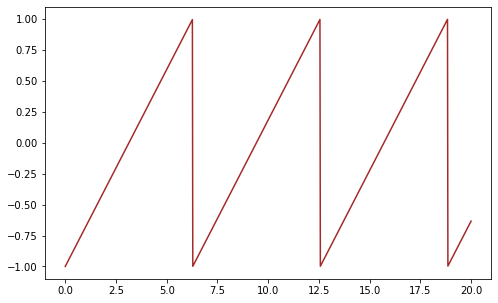

In [473]:
fig = plt.figure(figsize=(8, 5))
plt.plot(T,X,color='brown')
plt.show()

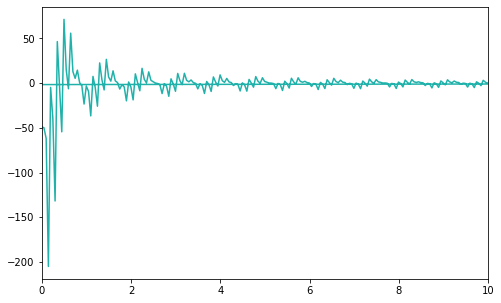

In [478]:
tt = fftfreq(n,T[1]-T[0])
xx = fft(X)
fig = plt.figure(figsize=(8, 5))
plt.plot(tt,xx,color='lightseagreen')
plt.xlim(0,10)
plt.show()

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [480]:
path='/Users/apple/Documents/SBU/Mine/hw8-hastihojabr-main/Sunspots.csv'
df = pd.read_csv(path)

In [481]:
df.head(2)

,Num,Date,Monthly
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3


In [482]:
df.isnull().sum()

Num        0
Date       0
Monthly    0
dtype: int64

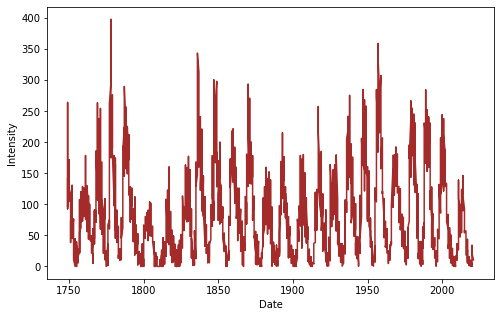

In [485]:
year=[] ; time = df['Date'].tolist() ; intensity = df['Monthly'].tolist()
for t in time:
    year.append(int(t[:4]))
fig = plt.figure(figsize=(8, 5))
plt.plot(year,intensity,color='brown')
plt.xlabel('Date') ; plt.ylabel('Intensity')
plt.show()

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

In [327]:
len(df['Monthly'].tolist())

3265

The main period is: 2.082695252679939 years.


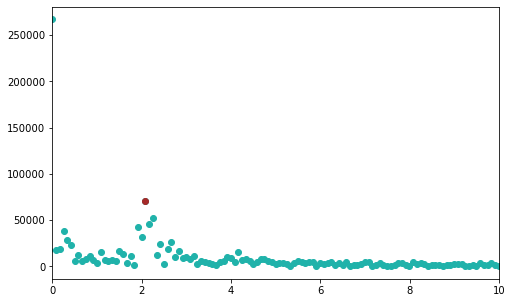

In [495]:
inten = df['Monthly'].tolist()  ; T = fftfreq(3265,d=1/272) #np.linspace(0,272,len(df['Date']))
xx = fft(inten) ; #=fftfreq(n)
#print(len(1),len(xx))
fig = plt.figure(figsize=(8, 5))
plt.scatter(T,abs(xx),color='lightseagreen')
i = np.argmax(abs(xx[10:]))
plt.scatter(T[i+10],abs(xx[i+10]),color='brown')
print('The main period is: {} years.'.format(T[i+10]))
plt.xlim(0,10)
plt.show()

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [496]:
from scipy.fft import ifft

In [497]:
inv = ifft(xx)
inv

array([ 96.7+3.34270641e-14j, 104.3-2.30333363e-14j,
       116.7+1.35797448e-14j, ...,  34. -3.28351265e-14j,
        21.8-2.92486811e-15j,  10.4+8.02380112e-15j])

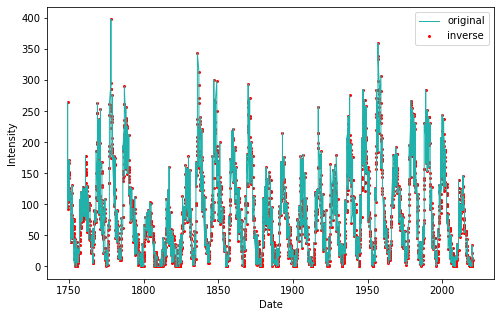

In [503]:
fig = plt.figure(figsize=(8, 5))
plt.plot(year,intensity,lw=1,color='lightseagreen',label='original')
plt.scatter(year,inv,s=4,color='r',label='inverse')
plt.xlabel('Date') ; plt.ylabel('Intensity')
plt.legend()
plt.show()

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

In [509]:
xx1 = abs(xx).copy()
xx1.sort()
xx_without_10biggest=xx1[:-10]
inv2 = ifft(xx_without_10biggest)
inv2

array([1498.25891611  -0.j        ,  379.48018798-351.31701984j,
        328.56199984-254.45116131j, ...,  286.76214277+224.3102131j ,
        328.56199984+254.45116131j,  379.48018798+351.31701984j])

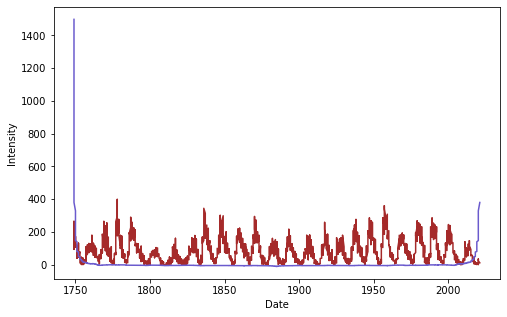

In [512]:
fig = plt.figure(figsize=(8, 5))
plt.plot(year,intensity,color='brown')
plt.plot(year[10:],inv2,color='slateblue')
plt.xlabel('Date') ; plt.ylabel('Intensity')
plt.show()

Why does the plot look different? And what's the difference?

The first ten data impacted out inverse fourier transform so much, they were critical to it. So as we can see inverse and original data doesnt match at all.

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [516]:
path='/Users/apple/Documents/SBU/Mine/hw8-hastihojabr-main/2pcf.txt'
with open(path) as f:
    lines = f.readlines()
data=[]
for line in lines : data.append(float(line[:-2]))

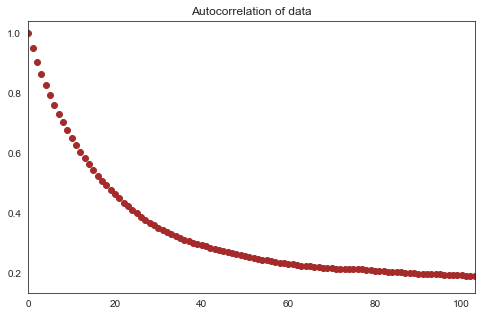

In [535]:
fig = plt.figure(figsize=(8, 5)) 
plt.acorr(np.array(data),usevlines=False,color='brown',label='name',maxlags=200)
plt.xlim(0, 103)
plt.title('Autocorrelation of data')
plt.show()
#Another way for doing this is using:
#from statsmodels.graphics import tsaplots
#data = pd.Series(x) 
#tsaplots.plot_acf(data,use_vlines=False,color=color,label=name)

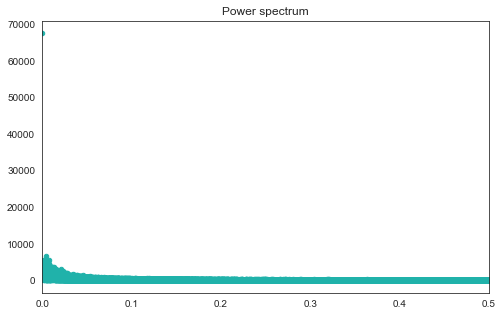

In [537]:
fig = plt.figure(figsize=(8, 5))
tt = fftfreq(len(data),1) 
xx = (fft(data)) 
plt.scatter(tt,abs(xx),s=20,color='lightseagreen')
plt.xlim(0,0.5) ; plt.title('Power spectrum')
plt.show()

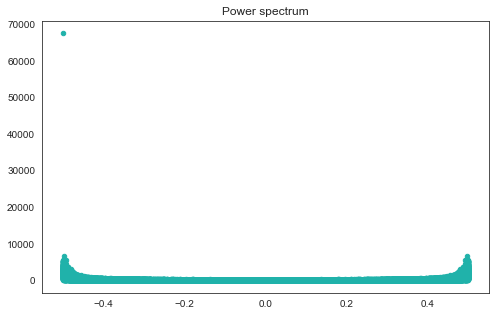

In [536]:
fig = plt.figure(figsize=(8, 5))
tt = fftfreq(len(data),1) 
xx = fftshift(fft(data)) 
plt.scatter(tt,abs(xx),s=20,color='lightseagreen')
plt.title('Power spectrum')
plt.show()

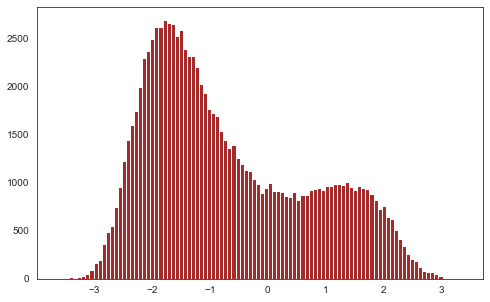

In [533]:
fig = plt.figure(figsize=(8, 5))
plt.hist(data,bins=100,color='brown')
plt.show()

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

In [4]:
path = '/Users/apple/Documents/SBU/Mine/hw8-hastihojabr-main/cmb_camb_N1024_PS12.npy'
data = np.load(path)
data.shape

(1024, 1024)

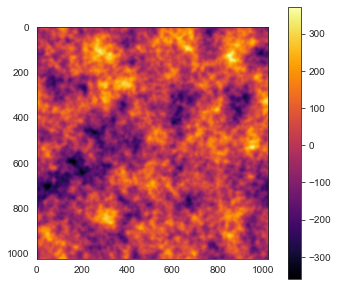

In [9]:
fig = plt.figure(figsize=(5, 5))
im= plt.imshow(data,'inferno')
plt.colorbar(im, fraction=0.1, pad=0.07)
plt.show()